Instead of performing our final project using PyCharm, we have used jupyter notebook to write functions and further analyze our hypothesis.

Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

As we go through our code, we store our tables into dataframes as and when required instead of loading those all at once.

In [2]:
match_details = pd.read_csv('Match.csv')

Checking for null or NaN values within the given table.

In [3]:
match_details.isnull().values.any()

True

In [4]:
match_details.isna().values.any()

True

After checking for null or NaN values, we find that some of the columns do contain null or NaN values, but there might be multiple possibilities for those to be in such a way, these include:
1. Match being cancelled due to rain or any such natural calamity
2. Tied match between two teams might have match_winner to be null
3. Similarly, Win_Type might have such null values in case of a drawn or cancelled match

For now, we do drop some of those from the columns that we might be using for our further analysis.

In [5]:
match_details = match_details.dropna(subset=['Toss_Winner', 'match_winner'])

Function below calculates total matches won by the team who have won the toss and vice versa.

In [6]:
def match_results():
    won = 0
    for index, row in match_details.iterrows():
        if row['Toss_Winner'] == row['match_winner']:
            won += 1
    
    loss = len(match_details) - won
    return won, loss

In [7]:
won, loss = match_results()

In [8]:
hypo_1 = pd.DataFrame({'Match results': ['Won', 'Lost'], 'No. of matches': [won, loss]})

## Hypothesis 1: Event of winning the toss is positively correlated with the event of a team winning the game

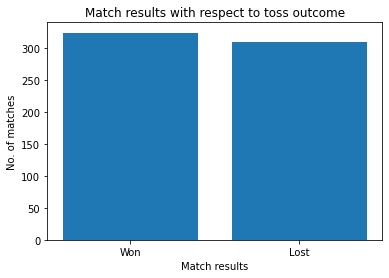

In [9]:
plt.bar(hypo_1['Match results'], height=hypo_1['No. of matches'])
plt.xlabel('Match results')
plt.ylabel('No. of matches')
plt.title('Match results with respect to toss outcome')
plt.show()

### From the given plot we can see that the bar "Won" which depicts the number of times team has won the match after winning the toss is similar to the bar "Lost" which depicts the number of times team has won the match after lossing the toss. Hence, we see that there is no such trend and hence we reject the hypothesis.

Below we read another table from our dataset named Ball_by_Ball

In [ ]:
overs_details = pd.read_csv('Ball_By_Ball.csv')

Death overs refer to over numbers from 17 through 20 which are considered to be very crucial for the entire game and hence, we apply the below given condition.

In [ ]:
over_details_death = overs_details[overs_details['Over_id']>16]

Next, we read the player table which we need to check our next hypothesis.

In [ ]:
player = pd.read_csv('Player.csv', encoding= 'unicode_escape')

Creating two different dataframes from the above table, one which consists of fast bolwers and the other which is for spinners. Further, we merge and create a pivot table for the same.

In [ ]:
fast_bowlers = player[(player['Bowling_skill']=='Right-arm medium')|(player['Bowling_skill']=='Right-arm fast-medium')|(player['Bowling_skill']=='Right-arm medium-fast')|(player['Bowling_skill']=='Left-arm fast-medium')|(player['Bowling_skill']=='Left-arm medium-fast')|(player['Bowling_skill']=='Right-arm fast')|(player['Bowling_skill']=='Left-arm fast')|(player['Bowling_skill']=='Left-arm medium')|(player['Bowling_skill']=='Right-arm medium fast')|(player['Bowling_skill']=='\xa0Right-arm fast-medium')|(player['Bowling_skill']=='\xa0Right-arm medium-fast')|(player['Bowling_skill']=='\xa0Left-arm fast')]

In [ ]:
slow_bowlers = player[(player['Bowling_skill']=='Right-arm offbreak')|(player['Bowling_skill']=='Legbreak googly')|(player['Bowling_skill']=='Slow left-arm orthodox')|(player['Bowling_skill']=='Slow left-arm chinaman')|(player['Bowling_skill']=='Legbreak')|(player['Bowling_skill']=='Right-arm bowler')|(player['Bowling_skill']=='\xa0Legbreak')|(player['Bowling_skill']=='\xa0Right-arm offbreak')]

In [ ]:
fast_data = pd.merge(over_details_death, fast_bowlers, how = 'inner', left_on=['BOWLER_SK'], right_on=['PLAYER_SK'])

In [ ]:
slow_data = pd.merge(over_details_death, slow_bowlers, how = 'inner', left_on=['BOWLER_SK'], right_on=['PLAYER_SK'])

In [ ]:
fast_pivot = pd.pivot_table(fast_data, index = ['MatcH_id', 'Innings_No'], columns = 'Over_id', values = 'Runs_Scored', aggfunc = 'sum', fill_value=0)

In [ ]:
slow_pivot = pd.pivot_table(slow_data, index = ['MatcH_id', 'Innings_No'], columns = 'Over_id', values = 'Runs_Scored', aggfunc = 'sum', fill_value=0)

In [ ]:
def economy_rate(data_pivot):    
    total_overs = 0
    total_runs = 0
    for i in range(0, len(data_pivot)):
        for j in data_pivot.values[i]:
            total_runs = total_runs + j
            if j != 0:
                total_overs += 1
    economy = total_runs/total_overs
    return economy

In [ ]:
fast_economy = economy_rate(fast_pivot)

In [ ]:
slow_economy = economy_rate(slow_pivot)

In [ ]:
hypo_1 = pd.DataFrame({'Bowler type': ['Fast', 'Slow'], 'Economy': [fast_economy, slow_economy]})

## Hypothesis 2: Fast bowlers are more effective than spinners during death overs. (Death over – Last 4 overs of the innings)

Note: Here we are assuming that the last 4 overs of the innings are overs 17-20.

In [ ]:
plt.bar(hypo_1['Bowler type'], height=hypo_1['Economy'])
plt.xlabel('Type of Bowler')
plt.ylabel('Economy rate')
plt.title('Economy rates with respect to the type of bowler')
plt.show()
print("The economy rate of fast bowlers is {} and that for spinners is {}".format(fast_economy, slow_economy))

### Here we can see that fast bowlers have a higher economy rate as compared to spinners, hence we reject the hypothesis as spinners which have a lower economy rate are more effective. Hence, from the above graph we can see that spinners are more effective as compared to fast bowlers during death overs.